<a href="https://colab.research.google.com/github/ayumnaf/CaseStudy4_Kelompok-H/blob/main/Data_Mining_Kelompok_H_Case_Study_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Studi Kasus Korelasi dan Regresi (PT Ashrae Energy)**

Kelompok H (Kelas A): 
1. Anatasya Oktaviani Handriati (1906296186)
2. Athaya Yumna Fathiyah (1906296192)
2. Dea Kristina (1906354053)
3. Eslim Suyangsu Rohmanullah (1906299471)
4. I Ketut Doni Damara (1906299502)
5. Salsabil Felia Armansyah (1806185815)
6. Tesalonicca Talitha (1906377826)

Data PT Ashrae Energy adalah perusahaan yang berfokus untuk meningkatkan kualitas hidup manusia, dengan berfokus pada perkembangan teknologi untuk membangun kehidupan manusia menjadi lebih baik. 

PT Ashrae Energy berfokus pada nilai perusahaan yaitu meningkatkan pengembangan energi yang efisien. Untuk meningkatkan pengembangan energi yang efisien, perlu diketahui terlebih dahulu variabel apa saja yang berpengaruh dalam konsumsi energi pada sampel observasi (*building*). Setelah diketahui variabel apa saja yang mempengaruhi konsumsi energi, harapan yang didapat adalah dapat dibuat sebuah kesimpulan yang dapat mengurangi pengunaan energi dan dapat menemukan formula yang sesuai dengan nilai perusahaan. 

Data yang diberikan terdiri dari beberapa variabel, dengan penjelasan setiap variabel sebagai berikut: 
*   meter_reading = Variabel Target (*dependent*), Konsumsi energi yang dipakai pada suatu gedung 
*   primary_use = Peruntukan (Kegunaan) dari gedung/*building* (16 kategori)
*   square_feet = Luas (kotor) tanah dari gedung/*building*
*   year_built = Tahun peresmian gedung 
*   floor_count = Jumlah lantai yang terdapat pada gedung 
*   air_temperature = Suhu udara di sekitar gedung (satuan celcius)
*   cloud_coverage = Proporsi dari langit yang tertutup oleh awan (satuan oktas)
*   dew_temperature = Kelembapan udara di sekitar gedung (satuan celcius)
*   precip_depth_1_hr = Curah hujan (presipitasi) selama satu jam (satuan milimeter)
*   sea_level_pressure = Tekanan atmosfer pada saat ketinggian sama dengan permukaan laut 
*   wind_direction = Arah angin (0-360 satuan derajat)
*   wind_speed = Kecepatan angin (m/s)

				

# Data yang Digunakan 

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv')
df.head()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


Pada info diatas, dapat terlihat jumlah *missing value* dari data dengan variabel **year_built** dan **floor_count** lebih dari 50%. Hal ini dapat disebabkan kesalahan pencatatan pada data, orang yang melakukan survei tidak melakukan survei secara menyeluruh pada gedung, atau kurangnya pengumpulan data terkait PBB-P2. Kedua variabel ini akan dihilangkan pada proses berikutnya.

In [ ]:
df.drop("year_built", axis=1, inplace=True)
df.drop("floor_count", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   air_temperature     1413 non-null   float64
 4   cloud_coverage      1396 non-null   float64
 5   dew_temperature     1413 non-null   float64
 6   precip_depth_1_hr   1237 non-null   float64
 7   sea_level_pressure  1324 non-null   float64
 8   wind_direction      1413 non-null   float64
 9   wind_speed          1413 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 110.5+ KB


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1220 non-null   float64
 1   primary_use         1220 non-null   object 
 2   square_feet         1220 non-null   int64  
 3   air_temperature     1220 non-null   float64
 4   cloud_coverage      1220 non-null   float64
 5   dew_temperature     1220 non-null   float64
 6   precip_depth_1_hr   1220 non-null   float64
 7   sea_level_pressure  1220 non-null   float64
 8   wind_direction      1220 non-null   float64
 9   wind_speed          1220 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 104.8+ KB


Terdapat juga *missing value* data pada beberapa variabel sisanya, oleh karena itu akan dihilangkan baris yang memiliki *missing value* dan tersisa 1220 data lengkap yang akan digunakan untuk proses selanjutnya

# Visualisasi Data (EDA)

Pada visualisasi data, akan kelompokan data menjadi data kategorik dan data numerik. Data Kategorik terdiri dari **wind_direction** dan **primary_use**. Variabel **wind_direction** merupakan variabel kategorik dikarenakan arah mata angin utama terdiri dari 4, yaitu timur, barat, selatan dan utara. Data yang dihasilkan oleh **wind_direction** merupakan arah mata angin kearah sebuah nilai derajat.  

**Data Kategorik**

In [ ]:
df['primary_use'].value_counts()

Education                        429
Office                           233
Entertainment/public assembly    158
Public services                  147
Lodging/residential              134
Other                             24
Parking                           22
Healthcare                        20
Warehouse/storage                 12
Services                           9
Retail                             8
Manufacturing/industrial           7
Food sales and service             5
Technology/science                 5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [ ]:
#Import package yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

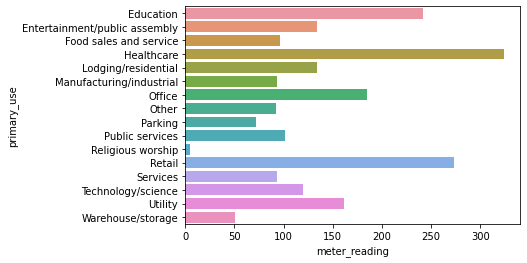

In [ ]:
# Menghitung rata-rata pemakaian energi per primary_use
df_primary_use = df.groupby('primary_use').aggregate({'meter_reading':np.mean})
df_primary_use.reset_index(inplace = True)
sns.barplot(x = 'meter_reading', y = 'primary_use', data = df_primary_use)

Pada *bar chart* tersebut, **religious worship** atau tempat ibadah merupakan gedung yang dengan penggunaan energi paling sedikit, karena kemungkinan tempat ibadah tidak beroperasi setiap hari, hanya di hari-hari tertentu saja (misalnya gereja, tempat ibadah paling umum di Amerika, beroperasi secara aktif di hari Sabtu dan Minggu).

Penggunaan gedung yang paling banyak memakai energi adalah **healthcare**, **retail**, **education**, **utility**  (perusahaan air, gas, atau listrik), office. Gedung-gedung yang digunakan untuk kebutuhan tersebut merupakan gedung-gedung yang waktu aktifnya lama (misalnya rumah sakit beroperasi 24 jam, sekolah dan pabrik beroperasi dari pagi hingga sore, dan toko yang bisa beroperasi sampai malam) sehingga tidak mengherankan jika pemakaian energinya lebih banyak daripada gedung yang digunakan untuk kebutuhan lain.

Selain itu, gedung-gedung dengan penggunaan tersebut juga umumnya menggunakan **steam**, yang dicurigai merupakan penyebab pemakaian energi terbesar.

Hal ini didapatkan, bahwa target pengurangan energi lebih baik dilakukan pada gedung-gedung dengan pemakaian energi yang cukup besar. Hal ini akan memberikan dampak yang lebih besar dibandingkan target diarahkan kepada gedung-gedung dengan pemakaian energi yang kecil. 

Plot Gambar dari variabel **Wind_speed** dan **Wind_Direction**

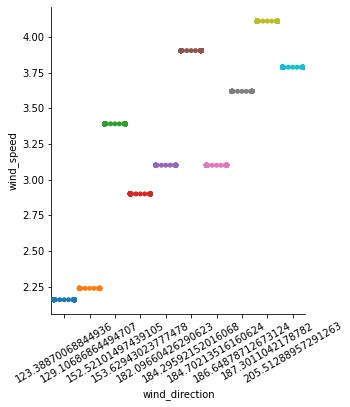

Dari visualisasi data diatas, didapatkan bahwa keseluruhan arah angin memiliki kecenderungan mengarah ke arah Tenggara, Selatan, dan Barat Daya. Arah angin dengan rata-rata kecepatan terbesar mengarah ke arah diantara Selatan - Barat Daya. Selain itu, arah angin dengan rata-rata kecepatan terendah mengarah kearah diantara Tenggara-Selatan. 

**Data Numerik**

In [ ]:
datnum_1 = df

In [ ]:
datnum_1.drop("primary_use", axis=1, inplace=True)
datnum_1.drop("wind_direction", axis=1, inplace=True)

In [ ]:
datnum_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1412
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1220 non-null   float64
 1   square_feet         1220 non-null   int64  
 2   air_temperature     1220 non-null   float64
 3   cloud_coverage      1220 non-null   float64
 4   dew_temperature     1220 non-null   float64
 5   precip_depth_1_hr   1220 non-null   float64
 6   sea_level_pressure  1220 non-null   float64
 7   wind_speed          1220 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 85.8 KB


In [ ]:
#Statistika Deskriptif
datnum_1.describe()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,177.946855,94248.848361,16.471980,2.281007,8.414446,1.041719,1016.581075,3.397821
std,287.765589,112289.202199,5.417993,1.285398,4.911634,0.813402,1.946086,0.603191
min,0.184487,283.000000,9.079138,0.338958,-0.304675,0.155325,1011.436563,2.157103
25%,29.748446,23097.750000,13.109654,1.092101,3.901814,0.775686,1016.426988,3.100911
50%,81.174928,59363.000000,15.502518,2.083712,8.285693,0.895980,1016.797495,3.619547
75%,187.132348,116858.500000,22.744816,2.998727,9.834399,1.033215,1017.949437,3.905433
max,3430.982972,875000.000000,24.963702,4.079235,17.379328,3.381837,1018.052063,4.112377


Dari hasil diatas, dapat terlihat nilai statistika deskriptif dari data. Jumlah data yang digunakan sebanyak 1220 data, dengan rata-rata (mean) dapat terlihat pada hasil diatas. Pada data diatas, dapat terlihat bahwa terdapat jarak yang cukup besar antara nilai minimum dan maksimum. Terlihat bahwa terdapat perbedaan satuan pengukuran pada data, sehingga pada proses Analisis Regresi akan dilakukan *data scale*. 

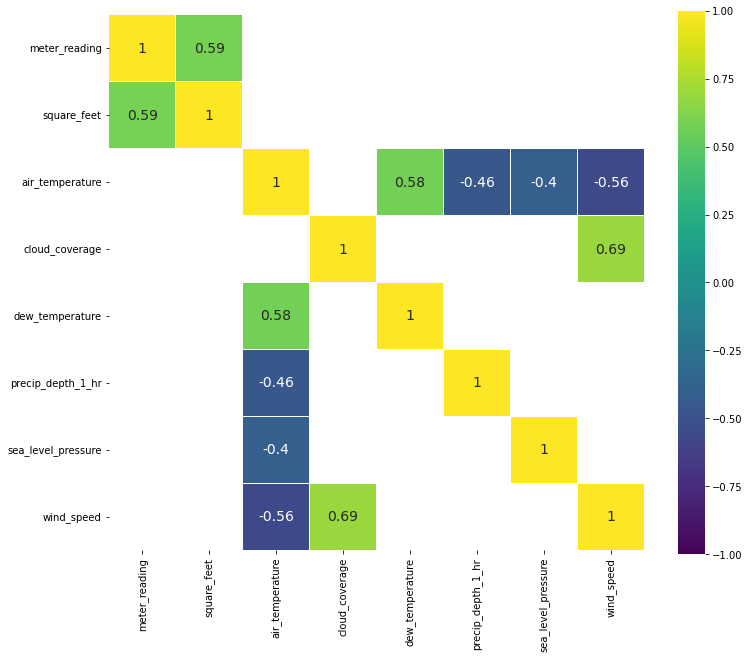

In [ ]:
# HeatMap untuk menyelidiki korelasi
import matplotlib.pyplot as plt
import seaborn as sns
corr2 = datnum_1.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 14}, square=True);

Dari Visualisasi diatas, didapatkan beberapa poin hubungan linier yaitu: 
1. Untuk Variabel Penjelas 
Dari hasil diatas dapat terlihat hubungan linier pada variabel penjelas tidak terlalu signifikan. Hal ini dapat terlihat dari hubungan beberapa variabel tersebut yang memiliki nilai korelasi yang cukup kecil dengan kotak bewarna putih. Korelasi linier dari variabel **cloud_coverage** dan **wind_speed** cukup tinggi dengan nilai 0,69. Namun, dari hasil ini dapat diindikasikan tidak terdapat pelanggaran asumsi multikolonearitas pada data. 

2. Untuk Variabel Penjelas dan Variabel Target (**meter_reading**)
Dari hasil diatas dapat terlihat hubungan linier terbesar antara **square_feet** dan **meter_reading**. Dari hal ini, didapatkan bahwa semakin tinggi luas tanah (**square_feet**), maka ada kecenderungan konsumsi energi yang digunakan oleh gedung tersebut (**meter_reading**) semakin meningkat. Selain itu, untuk variabel lainnya bukan bearti tidak terdapat hubungan, hanya saja mungkin hubungan yang didapat bukan merupakan hubungan linier.

# Korelasi dan Regresi

Pada proses korelasi dan regresi, variabel Wind_Direction akan dihilangkan dari proses ini. Hal ini disebabkan tidak terdapat data kearah mana gedung menghadap, sehingga sulit untuk dijelaskan pengaruh dari arah angin terhadap gedung. Berikut adalah proses dari korelasi dan regresi. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv')
df.drop("year_built", axis=1, inplace=True)
df.drop("floor_count", axis=1, inplace=True)
df.drop("wind_direction", axis=1, inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1412
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1220 non-null   float64
 1   primary_use         1220 non-null   object 
 2   square_feet         1220 non-null   int64  
 3   air_temperature     1220 non-null   float64
 4   cloud_coverage      1220 non-null   float64
 5   dew_temperature     1220 non-null   float64
 6   precip_depth_1_hr   1220 non-null   float64
 7   sea_level_pressure  1220 non-null   float64
 8   wind_speed          1220 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 95.3+ KB


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
plt.style.use('bmh'); sns.set()
dfnum1 = df.drop(["primary_use"], axis=1)
dfnum1.head()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed
0,237.749127,7432,22.744816,2.998727,17.379328,1.240589,1017.949437,3.391472
1,118.553743,2720,22.744816,2.998727,17.379328,1.240589,1017.949437,3.391472
2,23.626500,5376,22.744816,2.998727,17.379328,1.240589,1017.949437,3.391472
3,382.736016,23685,22.744816,2.998727,17.379328,1.240589,1017.949437,3.391472
4,1579.174237,116607,22.744816,2.998727,17.379328,1.240589,1017.949437,3.391472


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
dfnum1[['meter_reading','square_feet','air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed']] = scaler.fit_transform(dfnum1[['meter_reading','square_feet','air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed']]) 
dfnum1.head()
df1 = pd.concat([dfnum1,df['primary_use']],axis=1)
df1.head()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,primary_use
0,0.069245,0.008173,0.860312,0.711116,1.0,0.336358,0.984487,0.631302,Education
1,0.034502,0.002786,0.860312,0.711116,1.0,0.336358,0.984487,0.631302,Education
2,0.006833,0.005822,0.860312,0.711116,1.0,0.336358,0.984487,0.631302,Education
3,0.111505,0.026754,0.860312,0.711116,1.0,0.336358,0.984487,0.631302,Education
4,0.460240,0.132985,0.860312,0.711116,1.0,0.336358,0.984487,0.631302,Education


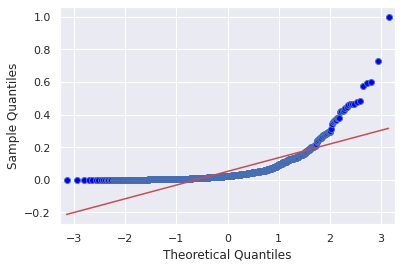

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(df1['meter_reading'], line='s')
pyplot.show()

Dari visualisasi diatas, dapat terlihat bahwa nilai yang terdapat meter_reading, teindikasi memiliki *outlier*. Hal ini dapat berdampak pada ketidak-akuratan dari model. *Outlier* ini dapat dimodelkan dengan model yang lain, dimana tidak digabungkan pemodelan dari data *outlier* dengan data sisanya. 

Namun, pada kasus ini hanya akan dilakukan regresi (pemodelan) untuk data non-*outlier*. Hal ini dipilih karena keterbatasan waktu untuk memodelkan data. Berikut adalah data tanpa *outlier* yang akan dilakukan pemodelan regresi.

In [ ]:
import numpy as np
ilangin_outlier = np.abs(df1.meter_reading - df1.meter_reading.mean())<=(2*df1.meter_reading.std())
df_2=df1[ilangin_outlier]
df_2

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,primary_use
0,0.069245,0.008173,0.860312,0.711116,1.000000,0.336358,0.984487,0.631302,Education
1,0.034502,0.002786,0.860312,0.711116,1.000000,0.336358,0.984487,0.631302,Education
2,0.006833,0.005822,0.860312,0.711116,1.000000,0.336358,0.984487,0.631302,Education
3,0.111505,0.026754,0.860312,0.711116,1.000000,0.336358,0.984487,0.631302,Education
5,0.008388,0.008822,0.860312,0.711116,1.000000,0.336358,0.984487,0.631302,Education
...,...,...,...,...,...,...,...,...,...
1408,0.002128,0.022105,0.000000,0.201360,0.272421,1.000000,0.870009,0.747948,Entertainment/public assembly
1409,0.001326,0.004590,0.000000,0.201360,0.272421,1.000000,0.870009,0.747948,Education
1410,0.002048,0.012555,0.000000,0.201360,0.272421,1.000000,0.870009,0.747948,Entertainment/public assembly
1411,0.054487,0.033716,0.000000,0.201360,0.272421,1.000000,0.870009,0.747948,Lodging/residential


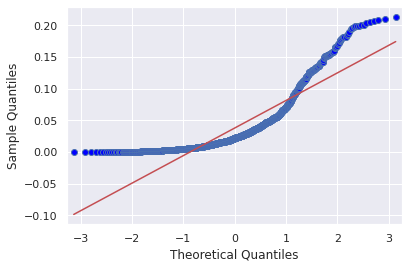

In [ ]:
# q-q plot
qqplot(df_2['meter_reading'], line='s')
pyplot.show()

In [ ]:
m = ols('meter_reading ~ square_feet + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_speed', df_2).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     79.83
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.29e-94
Time:                        09:27:37   Log-Likelihood:                 2235.4
No. Observations:                1169   AIC:                            -4455.
Df Residuals:                    1161   BIC:                            -4414.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0043      0

In [ ]:
m1 = ols('meter_reading ~ square_feet', df_2).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     533.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.87e-97
Time:                        09:28:20   Log-Likelihood:                 2225.7
No. Observations:                1169   AIC:                            -4447.
Df Residuals:                    1167   BIC:                            -4437.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0161      0.001     11.304      

Secara keseluruhan, seluruh variabel numerik dimasukan terlebih dahulu kedalam pemodelan. Didapatkan dari hasil model diatas bahwa pvalue dari F-stat <0.05 sehingg didapat disimpulkan bahwa hasil model berguna. Akan tetapi, kami kurang puas dengan hasil yang didapat dikarenakan nilai Adj_R^Squared yang didapatkan masih cukup kecil (sekitar 0.3). Oleh karena itu, kami akan mencoba menggunakan *stepwise forward selection* untuk mendapatkan variabel yang memberikan kecenderungan pengaruh yang signifikan. 

In [ ]:
##stepwise

def forward_selected(data, response):
  """Linear model designed by forward selection.
  https://planspace.org/20150423-forward_selection_with_statsmodels/
  Parameters:
  -----------
  data : pandas DataFrame with all possible predictors and response
  response: string, name of response column in data
  Returns:
  --------
  model: an "optimal" fitted statsmodels linear model with an intercept selected by forward selection evaluated by adjusted R-squared
  """
  remaining = set(data.columns)
  remaining.remove(response)
  selected = []
  current_score, best_new_score = 0.0, 0.0
  while remaining and current_score == best_new_score:
    scores_with_candidates = []
    for candidate in remaining:
      formula = "{} ~ {} + 1".format(response,
                                    ' + '.join(selected + [candidate]))
      score = smf.ols(formula, data).fit().rsquared_adj
      scores_with_candidates.append((score, candidate))
    scores_with_candidates.sort()
    best_new_score, best_candidate = scores_with_candidates.pop()
    if current_score < best_new_score:
      remaining.remove(best_candidate)
      selected.append(best_candidate)
      current_score = best_new_score
  formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
  model = smf.ols(formula, data).fit()
  return model

model = forward_selected(df_2, 'meter_reading')

print(model.model.formula)
print(model.rsquared_adj)

meter_reading ~ square_feet + primary_use + dew_temperature + wind_speed + 1
0.4137088508621827


Berdasarkan hasil dari *stepwise forward selection*, diperoleh model regresi meter_reading = square_feet + primary_use + dew_temperature + wind_speed 

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     46.79
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          2.01e-123
Time:                        09:29:09   Log-Likelihood:                 2326.9
No. Observations:                1169   AIC:                            -4616.
Df Residuals:                    1150   BIC:                            -4520.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

* Berdasarkan hasil di atas maka model regresi yang diperoleh adalah sebagai berikut.

  meter_reading = (0,2640)square_feet - (0.0170) primary_use[T.Entertainment/public assembly] + (0.0013) primary_use[T.Food sales and services] + (0.0138) primary_use[T.Healthcare] – (0.0084) primary_use[T.Lodging/residential] – (0.0055) primary_use[T.Manufacturing/industrial] – (0.0022) primary_use[T.Office] – (0.0217) primary_use[T.Other] – (0.0874) primary_use[T.Parking] – (0.0190) primary_use[T.Public services] – (0.0199) primary_use[T.Religious worship] – (0.0065) primary_use[T.Retail] – (0.0594) primary_use[T.Services] – (0.0047) primary_use[T.Technology/science] + (0.0197) primary_use[T.Utility] – (0.0217)primary_use[T.Warehouse/storage]  + (0.0242) dew_temperature + (0.0115) wind_speed 

  dengan model hasil yang signifikan adalah sebagai berikut: 
   meter_reading = (0,2640)square_feet - (0.0170) primary_use[T.Entertainment/public assembly] +  – (0.0084) primary_use[T.Lodging/residential] – (0.0217) primary_use[T.Other] – (0.0874) primary_use[T.Parking] – (0.0190) primary_use[T.Public services] – (0.0594) primary_use[T.Services] – (0.0217)primary_use[T.Warehouse/storage]  + (0.0242) dew_temperature + (0.0115) wind_speed 

*   Model berguna walaupun nilai Adj_R^Squared tidak cukup baik, berdasarkan p-value < 0,05 dan nilai Adj_R^Squared sebesar 0,414 artinya 41,4% variansi dari variabel kategori kegiatan(primary_use), luas bangunan(square_fit), kelembaban(dew_temperature), kecepatan angin(wind_speed) dapat menjelaskan  konsumsi energi(meter_reading)

*   Namun, selisih dari nilai R^Squared dan Adj_R^Squared cukup kecil, sehingga didapatkan bahwa variabel yang didefinisikan dalam model cukup baik dengan data yang cukup banyak untuk memperhitungkan model yang didapat. Hal ini juga dapat menjadi poin penting bahwa dengan nilai Adj_R^squared yang cukup kecil, hasil yang didapat cukup baik. 

*   Pada variabel kategori kegiatan (primary_use) terdapat kategori yang signifikan, yaitu Entertaiment/public assembly, lodging/residential, parking, public services, services, warehouse/storage, dan other. 

* Pada variabel numerik, variabel yang berpengaruh adalah square feet, dev_temperatur, dan wind_speed.




## Kesimpulan dan Saran

1. Berdasarkan model regresi, variabel kategori kegiatan(primary_use), luas bangunan(square_fit), kelembaban(dew_temperature), kecepatan angin(wind_speed) ada kecenderungan mempengaruhi konsumsi energi (meter_reading)

2. Tidak terdapat indikasi multikolinearitas pada data

3. Dari data kategorik, didapatkan bahwa keseluruhan arah angin memiliki kecenderungan mengarah ke arah Tenggara, Selatan, dan Barat Daya. Arah angin dengan rata-rata kecepatan terbesar mengarah ke arah diantara Selatan - Barat Daya. Selain itu, arah angin dengan rata-rata kecepatan terendah mengarah kearah diantara Tenggara-Selatan. 

4. Data pada file dapat ditambahkan variabel lain untuk pemodelan yang lebih baik. Seperti contohhnya data hadap arah gedung, dan lain-lain. 

5. Terdapat missing value yang cukup besar pada dua variabel, dapat diperhatikan proses pengambilan data agar variabel dapat dipakai dengan baik untuk kedepannya. 